# STAT3612 Lecture 8 - 	Tree-based Methods

[Dr. Aijun Zhang](http://www.statsoft.org)  - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

27 October 2020

# Decision Trees

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.colors as col
def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)
    
    plt.title(title, fontsize = 20)

In [ ]:
mixture_data = pd.read_table('./mixture.txt',sep=',',index_col=0)
x_mix,y_mix=mixture_data.iloc[:,:2].values,mixture_data['y'].values

Accuracy: 0.79


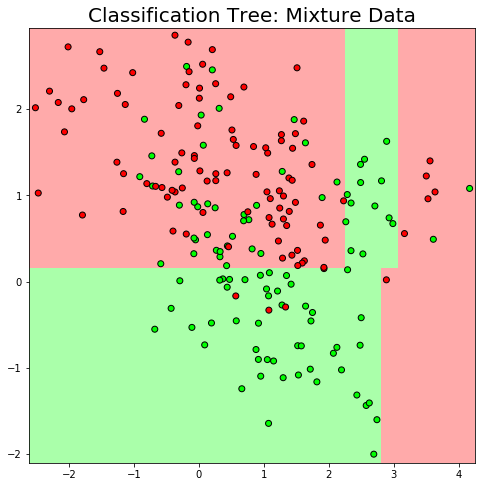

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_mix,y_mix)

# decision boundary
print('Accuracy:',accuracy_score(y_mix,dt.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,dt,"Classification Tree: Mixture Data")
plt.show()

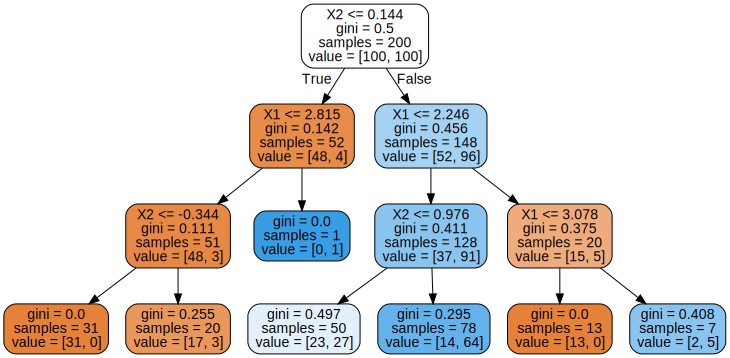

In [ ]:
# tree plot
import graphviz
from sklearn.tree import export_graphviz
dot_graph = export_graphviz(
        dt,
        out_file=None, 
        feature_names=['X1','X2'],
        rounded=True,
        filled=True
    )
tree_graph = graphviz.Source(dot_graph)
tree_graph

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
x_iris,y_iris = iris.data[:,:2],iris.target

Accuracy: 0.8133333333333334


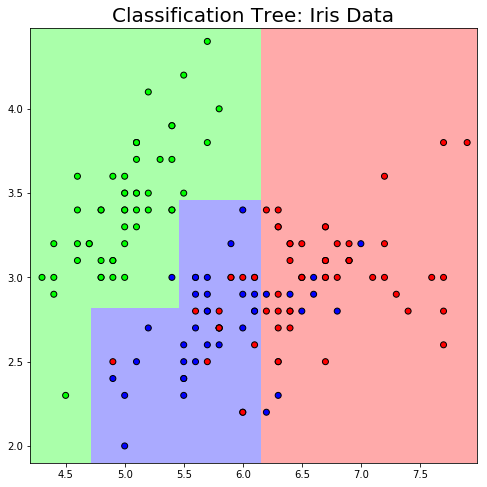

In [ ]:
# fit iris data with first two features
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_iris,y_iris)

print('Accuracy:',accuracy_score(y_iris,dt.predict(x_iris[:,:2])))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,dt,"Classification Tree: Iris Data")
plt.show()

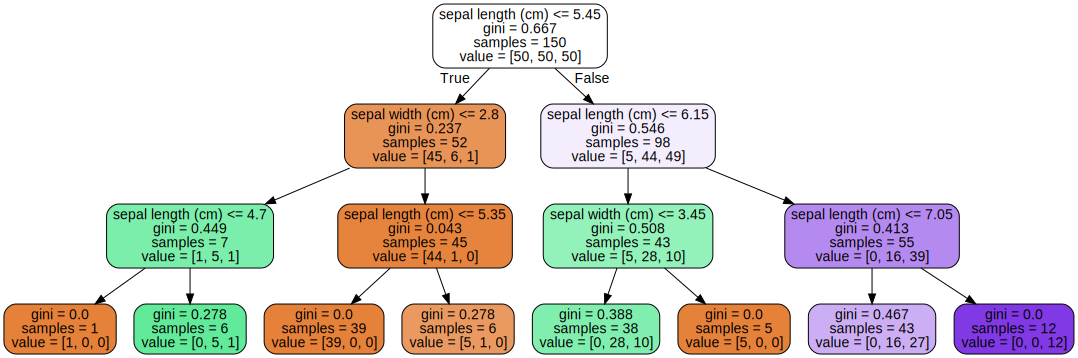

In [ ]:
dot_graph = export_graphviz(
        dt,
        out_file=None, 
        feature_names=iris.feature_names[:2],
        rounded=True,
        filled=True
    )
tree_graph = graphviz.Source(dot_graph)
tree_graph

# Bagging

Training Accuracy: 0.93
OOB Accuracy: 0.825


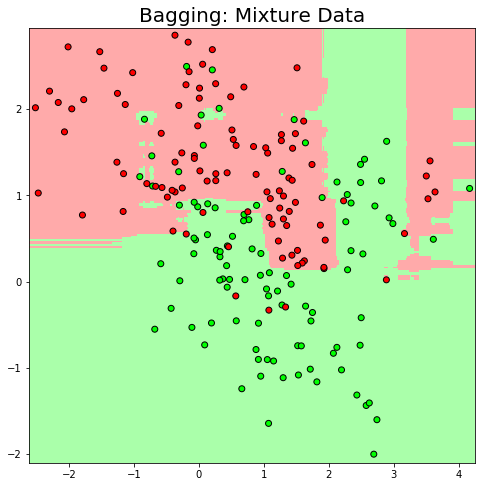

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(n_estimators=300, max_samples=100, oob_score=True)
bag_clf.fit(x_mix, y_mix)
print("Training Accuracy:", accuracy_score(y_mix, bag_clf.predict(x_mix)))
print("OOB Accuracy:", bag_clf.oob_score_)

plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,bag_clf,'Bagging: Mixture Data')
plt.show()

Training Accuracy: 0.9
OOB Accuracy: 0.7133333333333334


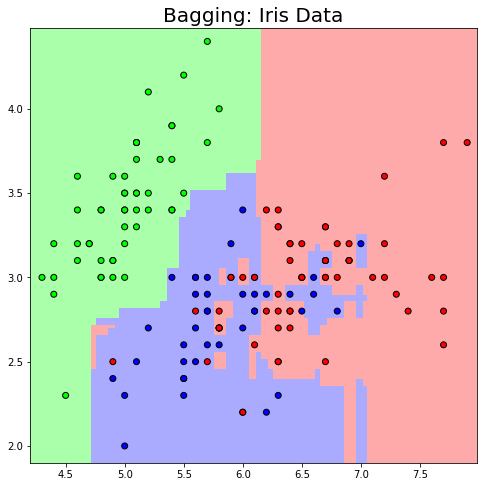

In [ ]:
bag_clf = BaggingClassifier(n_estimators=300, max_samples=100, oob_score=True)
bag_clf.fit(x_iris, y_iris)
print("Training Accuracy:", accuracy_score(y_iris, bag_clf.predict(x_iris)))
print("OOB Accuracy:", bag_clf.oob_score_)

plt.figure(figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,bag_clf,'Bagging: Iris Data')
plt.show()

# Random Forests

Training Accuracy: 1.0
OOB Accuracy: 0.825


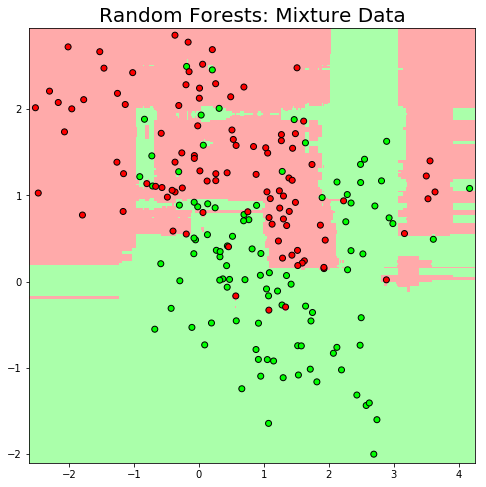

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, RF_clf.predict(x_mix)))
print("OOB Accuracy:", RF_clf.oob_score_)

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,RF_clf,'Random Forests: Mixture Data')
plt.show()

Training Accuracy: 0.9266666666666666
OOB Accuracy: 0.72


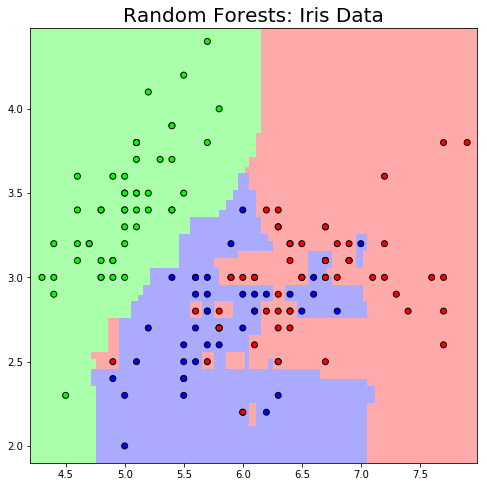

In [ ]:
RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, RF_clf.predict(x_iris)))
print("OOB Accuracy:", RF_clf.oob_score_)

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,RF_clf,'Random Forests: Iris Data')
plt.show()

# AdaBoost

Training Accuracy: 0.91


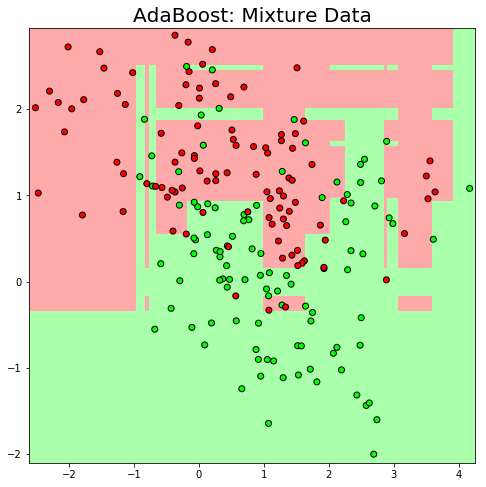

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AB_clf = AdaBoostClassifier()
AB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, AB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,AB_clf,'AdaBoost: Mixture Data')
plt.show()

Training Accuracy: 0.72


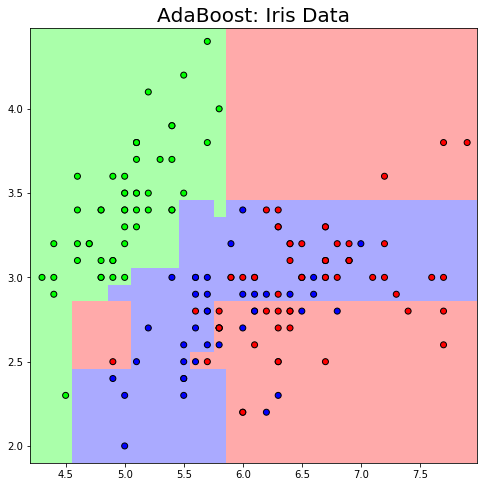

In [ ]:
AB_clf = AdaBoostClassifier()
AB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, AB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,AB_clf,'AdaBoost: Iris Data')
plt.show()

# Gradient Boosting

Training Accuracy: 0.99


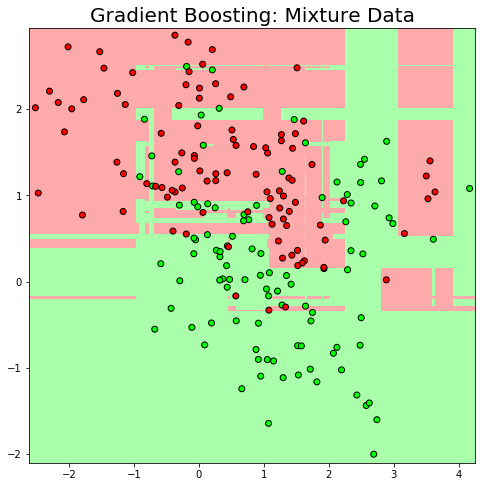

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, GB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,GB_clf,'Gradient Boosting: Mixture Data')
plt.show()

Training Accuracy: 0.92


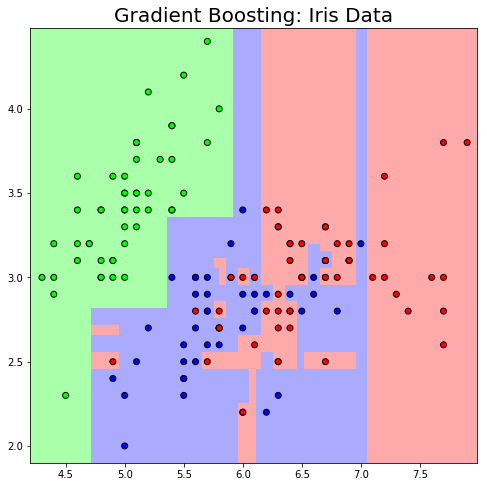

In [ ]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, GB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,GB_clf,'Gradient Boosting: Iris Data')
plt.show()

# XGBoost

/Users/zhanght/anaconda3/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Training Accuracy: 0.99


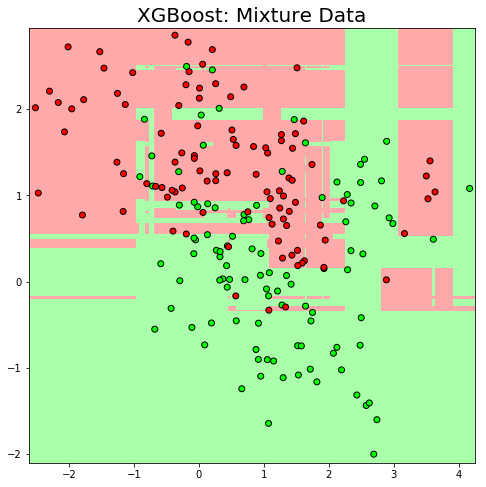

In [ ]:
from xgboost import XGBClassifier

XGB_clf = GradientBoostingClassifier()
XGB_clf.fit(x_mix,y_mix)
print("Training Accuracy:", accuracy_score(y_mix, XGB_clf.predict(x_mix)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,XGB_clf,'XGBoost: Mixture Data')
plt.show()

Training Accuracy: 0.92


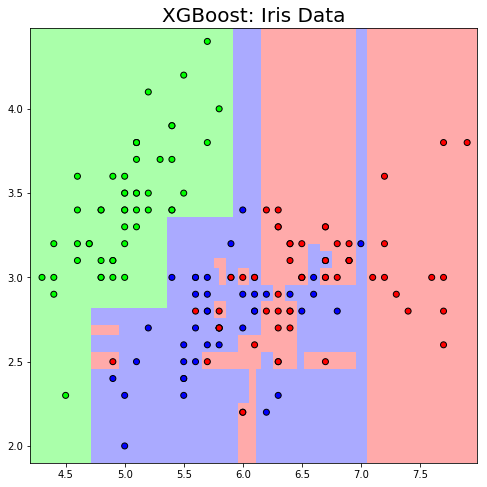

In [ ]:
XGB_clf = GradientBoostingClassifier()
XGB_clf.fit(x_iris,y_iris)
print("Training Accuracy:", accuracy_score(y_iris, XGB_clf.predict(x_iris)))

plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_iris,y_iris,XGB_clf,'XGBoost: Iris Data')
plt.show()